In [12]:
# download the packages
! pip install scikit-learn
! pip install scipy
! pip install aspose-words

### Import third-party Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

### Import Modules

In [2]:
import k_means
import png2svg_func
import svg2png_func
import mse_func

### Tranditional Method

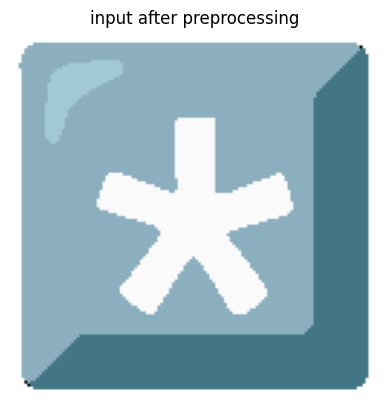

In [11]:
original = cv2.imread('../png/128/emoji_u002a_20e3.png', cv2.IMREAD_UNCHANGED)

M, N, _ = original.shape
transparent = np.zeros((M, N))
for i in range(M):
    for j in range(N):
        if original[i, j, 3] == 0:
            transparent[i, j] = 1

img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
img = k_means.coverting_img(img, 32)
img = png2svg_func.smooth_detail(img)

for i in range(M):
    for j in range(N):
        if transparent[i, j]:
            img[i, j] = np.array([255, 255, 255])

plt.title('input after preprocessing')
plt.axis('off')
plt.imshow(img)
img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)
# cv2.imwrite('preprocess.png', img)


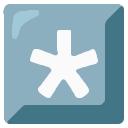

In [12]:
svg_image = png2svg_func.png2svg(img, 1)
with open('result.svg', 'w') as fh:
    fh.write(svg_image)
SVG('result.svg')

In [13]:
svg2png_func.svg2png('result.svg')
result = cv2.imread('result.png')
MSE = mse_func.calculate_mse(original, result)  # BGR
print(f'MSE = {MSE}')


MSE = 47.907552083333336


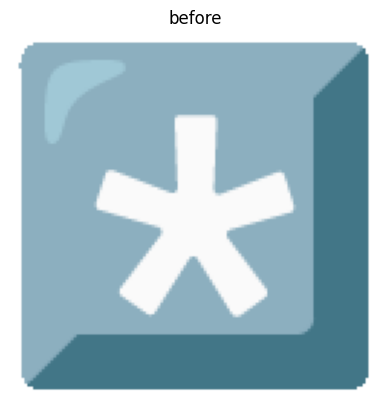

In [14]:
original_RGB = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
for i in range(M):
    for j in range(N):
        if transparent[i, j]:
            original_RGB[i, j] = np.array([255, 255, 255])
plt.title('before')
plt.axis('off')
plt.imshow(original_RGB)


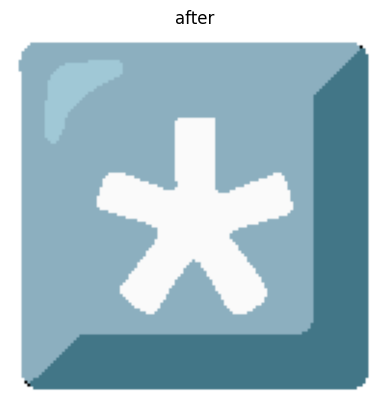

In [15]:
result_RGB = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.title('after')
plt.axis('off')
plt.imshow(result_RGB)
